In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format

In [2]:
training_df=pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

training_df["median_house_value"] /= 1000.0

training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [3]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [4]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [5]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 499058.5312 - root_mean_squared_error: 635.1352
Epoch 2/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28454.9980 - root_mean_squared_error: 168.6691
Epoch 3/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27262.2422 - root_mean_squared_error: 165.0948
Epoch 4/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25670.6543 - root_mean_squared_error: 160.1830
Epoch 5/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26435.1836 - root_mean_squared_error: 162.4985
Epoch 6/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25323.7949 - root_mean_squared_error: 159.1017
Epoch 7/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23993.6797 - root_mean_squared_error: 154.8822
Epoch 8/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23713.2793 - root_mean_squared_error: 153.9783
Epoch 9/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23296.3848 - root_mean_squared_error: 152.6248
Epoch 10/30
567/567 ━━━━━━━━━━━━━━━━

C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Temp\ipykernel_14020\2728482424.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n The learned weight %.4f"% weight)
C:\Users\Sumit Kumar.DESKTOP-FNL8J4G\AppData\Local\Temp\ipykernel_14020\2728482424.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\n The learned bisa %.4f"%bias)


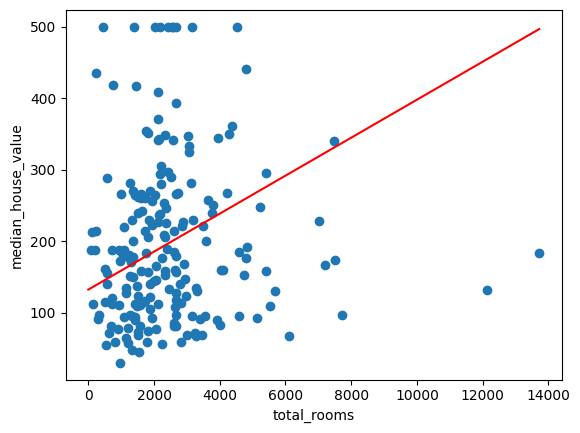

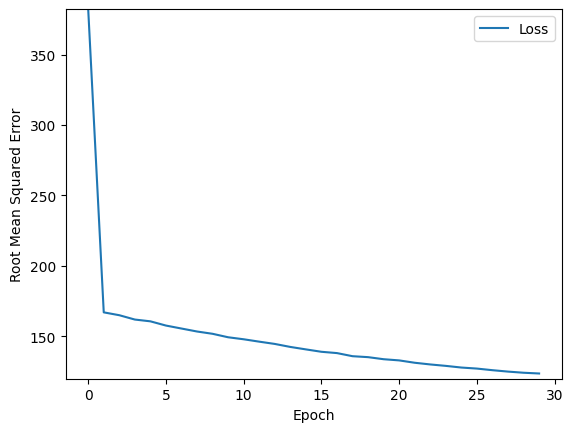

In [6]:
learning_rate=0.01
epochs=30
batch_size=30

my_feature="total_rooms"
my_label="median_house_value"

my_model=None

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

print("\n The learned weight %.4f"% weight)
print("\n The learned bisa %.4f"%bias)

plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)


In [7]:
def predict_house_values(n,feature,label):
    batch=training_df[feature][10000:10000 + n]
    predicted_values=my_model.predict_on_batch(x=batch)
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    for i in range(n):
        print("%5.0f %6.0f %15.0f"%(training_df[feature][10000+i],
                                    training_df[label][10000+i],
                                    predicted_values[i][0]))
    

In [8]:
predict_house_values(10,my_feature,my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1960     53             184
 3400     92             223
 3677     69             230
 2202     62             191
 2403     80             196
 5652    295             282
 3318    500             221
 2552    342             200
 1364    118             169
 3468    128             224


Epoch 1/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 35181.3672 - root_mean_squared_error: 186.9891
Epoch 2/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 21683.0547 - root_mean_squared_error: 147.1825
Epoch 3/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 19438.7988 - root_mean_squared_error: 139.3855
Epoch 4/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 17682.2461 - root_mean_squared_error: 132.9495
Epoch 5/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 17648.2754 - root_mean_squared_error: 132.8054
Epoch 6/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 18192.3594 - root_mean_squared_error: 134.8730
Epoch 7/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 18084.6035 - root_mean_squared_error: 134.4643
Epoch 8/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 17883.4941 - root_mean_squared_error: 133.7031
Epoch 9/18
5667/5667 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 18169.3789 - root_mean_squared_error: 134.7779
Epoch 10/1

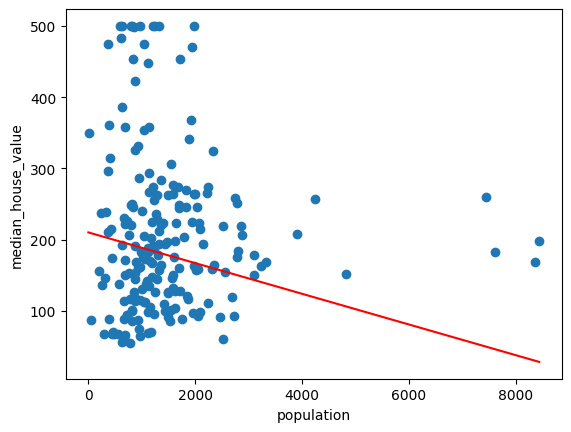

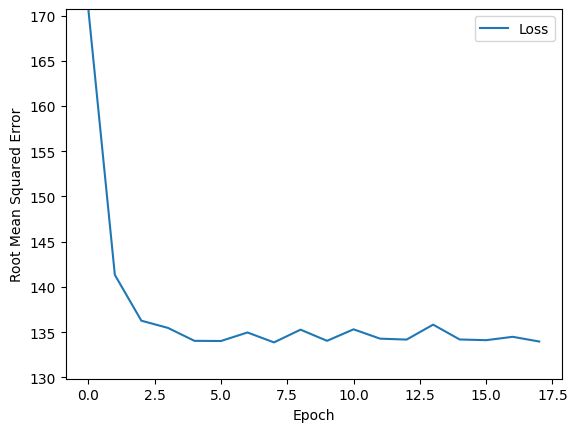

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
 1286     53             182
 1867     92             170
 2191     69             163
 1052     62             188
 1647     80             175
 2312    295             160
 1604    500             176
 1066    342             187
  338    118             203
 1604    128             176


In [10]:
my_feature="population"

learning_rate=0.05
epochs=18
batch_size=3

my_model=build_model(learning_rate)
weight,bias,epochs,rmse=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)
predict_house_values(10,my_feature,my_label)